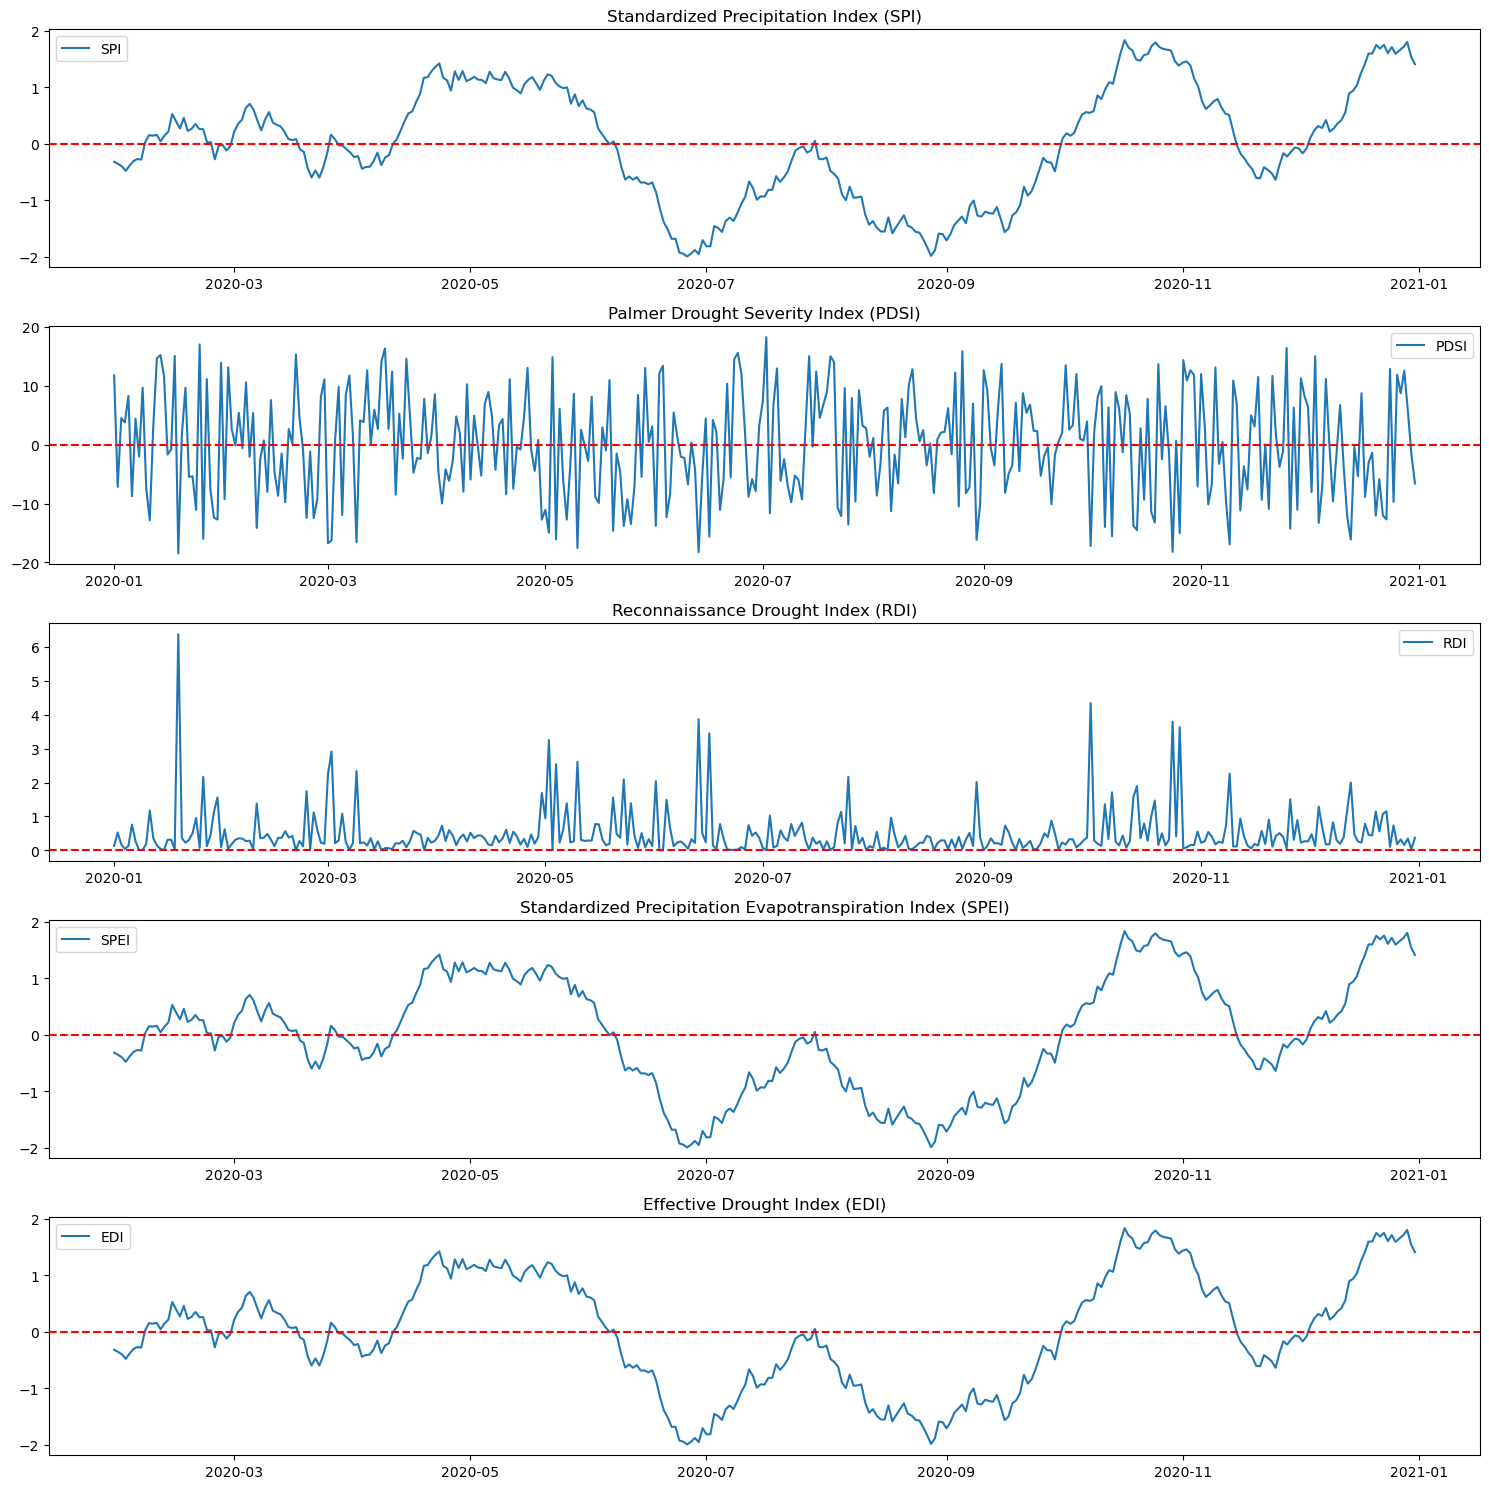

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for precipitation and temperature (extracted from gridmet for a sample location)
data = {
    'date': pd.date_range(start='2020-01-01', end='2020-12-31', freq='D'),
    'precipitation': np.random.rand(366) * 10,  # Random precipitation data (mm)
    'temperature': np.random.rand(366) * 30  # Random temperature data (°C)
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate Standardized Precipitation Index (SPI)
def calculate_spi(precipitation, scale=30):
    rolling_precip = precipitation.rolling(window=scale).sum()
    spi = (rolling_precip - rolling_precip.mean()) / rolling_precip.std()
    return spi

# Calculate Palmer Drought Severity Index (PDSI)
def calculate_pdsi(temperature, precipitation):
    # Simplified PDSI calculation
    pdsi = (temperature - temperature.mean()) - (precipitation - precipitation.mean())
    return pdsi

# Calculate Reconnaissance Drought Index (RDI)
def calculate_rdi(temperature, precipitation):
    rdi = precipitation / (temperature + 1)
    return rdi

# Calculate Standardized Precipitation Evapotranspiration Index (SPEI)
def calculate_spei(precipitation, temperature, scale=30):
    evapotranspiration = 0.0023 * (temperature + 17.8) * np.sqrt(temperature) * (1 - np.exp(-0.02 * precipitation))
    water_balance = precipitation - evapotranspiration
    rolling_balance = water_balance.rolling(window=scale).sum()
    spei = (rolling_balance - rolling_balance.mean()) / rolling_balance.std()
    return spei

# Calculate Effective Drought Index (EDI)
def calculate_edi(precipitation, scale=30):
    rolling_precip = precipitation.rolling(window=scale).sum()
    mean_precip = rolling_precip.mean()
    std_precip = rolling_precip.std()
    edi = (rolling_precip - mean_precip) / std_precip
    return edi

# Add drought indices to DataFrame
df['spi'] = calculate_spi(df['precipitation'])
df['pdsi'] = calculate_pdsi(df['temperature'], df['precipitation'])
df['rdi'] = calculate_rdi(df['temperature'], df['precipitation'])
df['spei'] = calculate_spei(df['precipitation'], df['temperature'])
df['edi'] = calculate_edi(df['precipitation'])

# Plot drought indices
plt.figure(figsize=(15, 15))

plt.subplot(5, 1, 1)
plt.plot(df['date'], df['spi'], label='SPI')
plt.axhline(0, color='red', linestyle='--')
plt.title('Standardized Precipitation Index (SPI)')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df['date'], df['pdsi'], label='PDSI')
plt.axhline(0, color='red', linestyle='--')
plt.title('Palmer Drought Severity Index (PDSI)')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df['date'], df['rdi'], label='RDI')
plt.axhline(0, color='red', linestyle='--')
plt.title('Reconnaissance Drought Index (RDI)')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df['date'], df['spei'], label='SPEI')
plt.axhline(0, color='red', linestyle='--')
plt.title('Standardized Precipitation Evapotranspiration Index (SPEI)')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df['date'], df['edi'], label='EDI')
plt.axhline(0, color='red', linestyle='--')
plt.title('Effective Drought Index (EDI)')
plt.legend()

plt.tight_layout()
plt.show()
